# IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')

# IMPORTING DATASET

In [2]:
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price (in lakhs)
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape, data.columns

((13320, 9),
 Index(['area_type', 'availability', 'location', 'size', 'society',
        'total_sqft', 'bath', 'balcony', 'price (in lakhs)'],
       dtype='object'))

In [4]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

# DATA CLEANING

In [6]:
data = data.drop(['area_type','society','balcony','availability'],axis='columns')
data.shape

(13320, 5)

#### Data Cleaning: Handle NA values

In [7]:
data.isnull().sum()

location             1
size                16
total_sqft           0
bath                73
price (in lakhs)     0
dtype: int64

In [8]:
data = data.dropna()
data.isnull().sum()

location            0
size                0
total_sqft          0
bath                0
price (in lakhs)    0
dtype: int64

In [9]:
data.shape

(13246, 5)

# FEATURE ENGINEERING
### 1. size

In [10]:
#Add new feature(integer) for bhk (Bedroom Hall Kitchen)
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))
data 
data.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

### 2. total_sqft

In [11]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [12]:
data[~data['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price (in lakhs),bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [13]:
def sqft_range_num(x):
    n = x.split('-')
    if len(n) == 2:
        return (float(n[0])+float(n[1]))/2
    try:
        return float(x)
    except:
        return None   

In [14]:
data['total_sqft'] = data['total_sqft'].apply(sqft_range_num)
data = data[data['total_sqft'].notnull()]
data.head()

,location,size,total_sqft,bath,price (in lakhs),bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


### 3. New feature - price_per_sqft

In [15]:
data['price_per_sqft'] = data['price (in lakhs)']*100000/data['total_sqft']
data.head()

,location,size,total_sqft,bath,price (in lakhs),bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [16]:
data['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [17]:
data['location'] = data['location'].apply(lambda x: x.strip())
loc_stats = data['location'].value_counts(ascending=False)
loc_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

# Dimensionality Reduction
### location

In [18]:
len(loc_stats)

1287

In [19]:
print("location stats > 10 : ",len(loc_stats[loc_stats>10]),"    location stats <= 10 : ",len(loc_stats[loc_stats<=10]))

location stats > 10 :  240     location stats <= 10 :  1047


In [20]:
loc_stats_less_than_10 = loc_stats[loc_stats<=10]
loc_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [21]:
print("Total no of locations : ",len(data["location"].unique()))

Total no of locations :  1287


In [22]:
data['location'] = data['location'].apply(lambda x: 'other' if x in loc_stats_less_than_10 else x)
len(data['location'].unique())

241

In [23]:
data.head()

,location,size,total_sqft,bath,price (in lakhs),bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


# OUTLIERS
### 1. price_per_sqft

In [24]:
data[data.total_sqft/data.bhk<300].head()

,location,size,total_sqft,bath,price (in lakhs),bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [25]:
data[data.total_sqft/data.bhk<300].shape

(744, 7)

In [26]:
data = data[~(data['total_sqft']/data['bhk']<300)]
data.shape

(12456, 7)

In [27]:
data['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [28]:
def remove_outliers_price_per_sqft(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data = remove_outliers_price_per_sqft(data)
data.shape

(10242, 7)

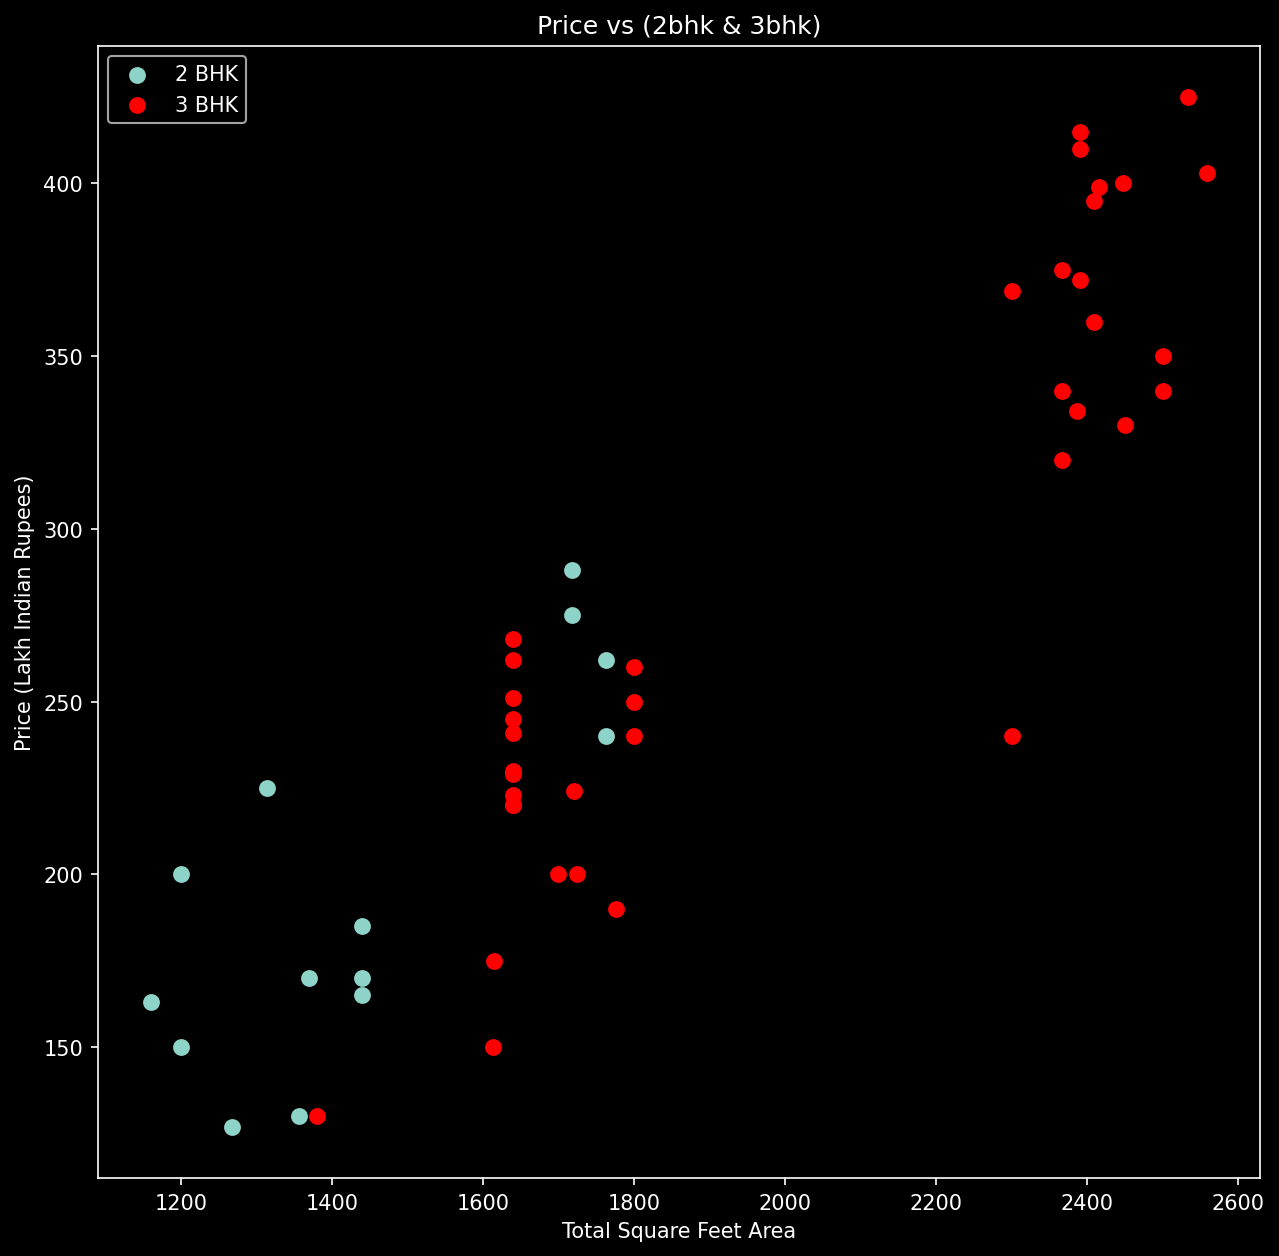

In [29]:
location = "Rajaji Nagar"
bhk_2 = data[(data['location']==location) & (data['bhk']==2)]
bhk_3 = data[(data['location']==location) & (data['bhk']==3)]
plt.figure(dpi=150, figsize=(10,10))
plt.scatter(bhk_2.total_sqft,bhk_2['price (in lakhs)'],label='2 BHK', s=50)
plt.scatter(bhk_3.total_sqft,bhk_3['price (in lakhs)'],color='red',label='3 BHK', s=50)
plt.xlabel("Total Square Feet Area")
plt.ylabel("Price (Lakh Indian Rupees)")
plt.title("Price vs (2bhk & 3bhk)")
plt.legend()

### 2. bhk

In [30]:
#Remove 2bhk apartments whose price_per_sqft is less than 1 BHK price_per_sqft
def remove_outliers_bhk(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
new_data = remove_outliers_bhk(data)
data =  new_data
data.shape

(7317, 7)

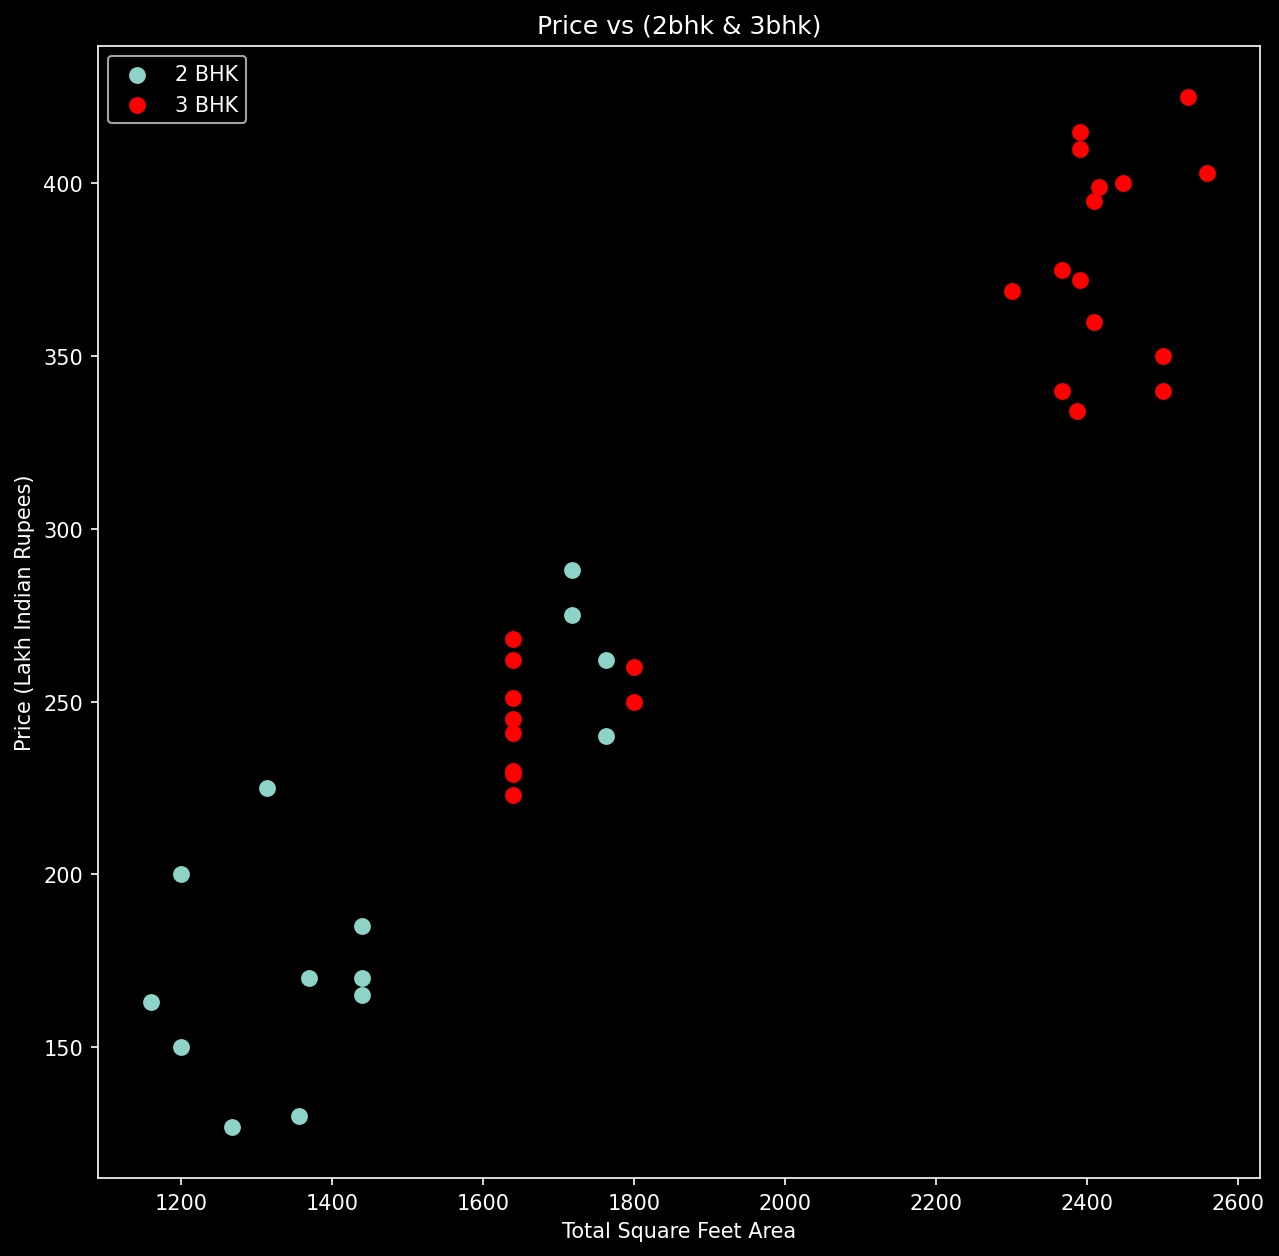

In [31]:
location = "Rajaji Nagar"
bhk_2 = data[(data['location']==location) & (data['bhk']==2)]
bhk_3 = data[(data['location']==location) & (data['bhk']==3)]
plt.figure(dpi=150, figsize=(10,10))
plt.scatter(bhk_2.total_sqft,bhk_2['price (in lakhs)'],label='2 BHK', s=50)
plt.scatter(bhk_3.total_sqft,bhk_3['price (in lakhs)'],color='red',label='3 BHK', s=50)
plt.xlabel("Total Square Feet Area")
plt.ylabel("Price (Lakh Indian Rupees)")
plt.title("Price vs (2bhk & 3bhk)")
plt.legend()

Text(0, 0.5, 'Count')

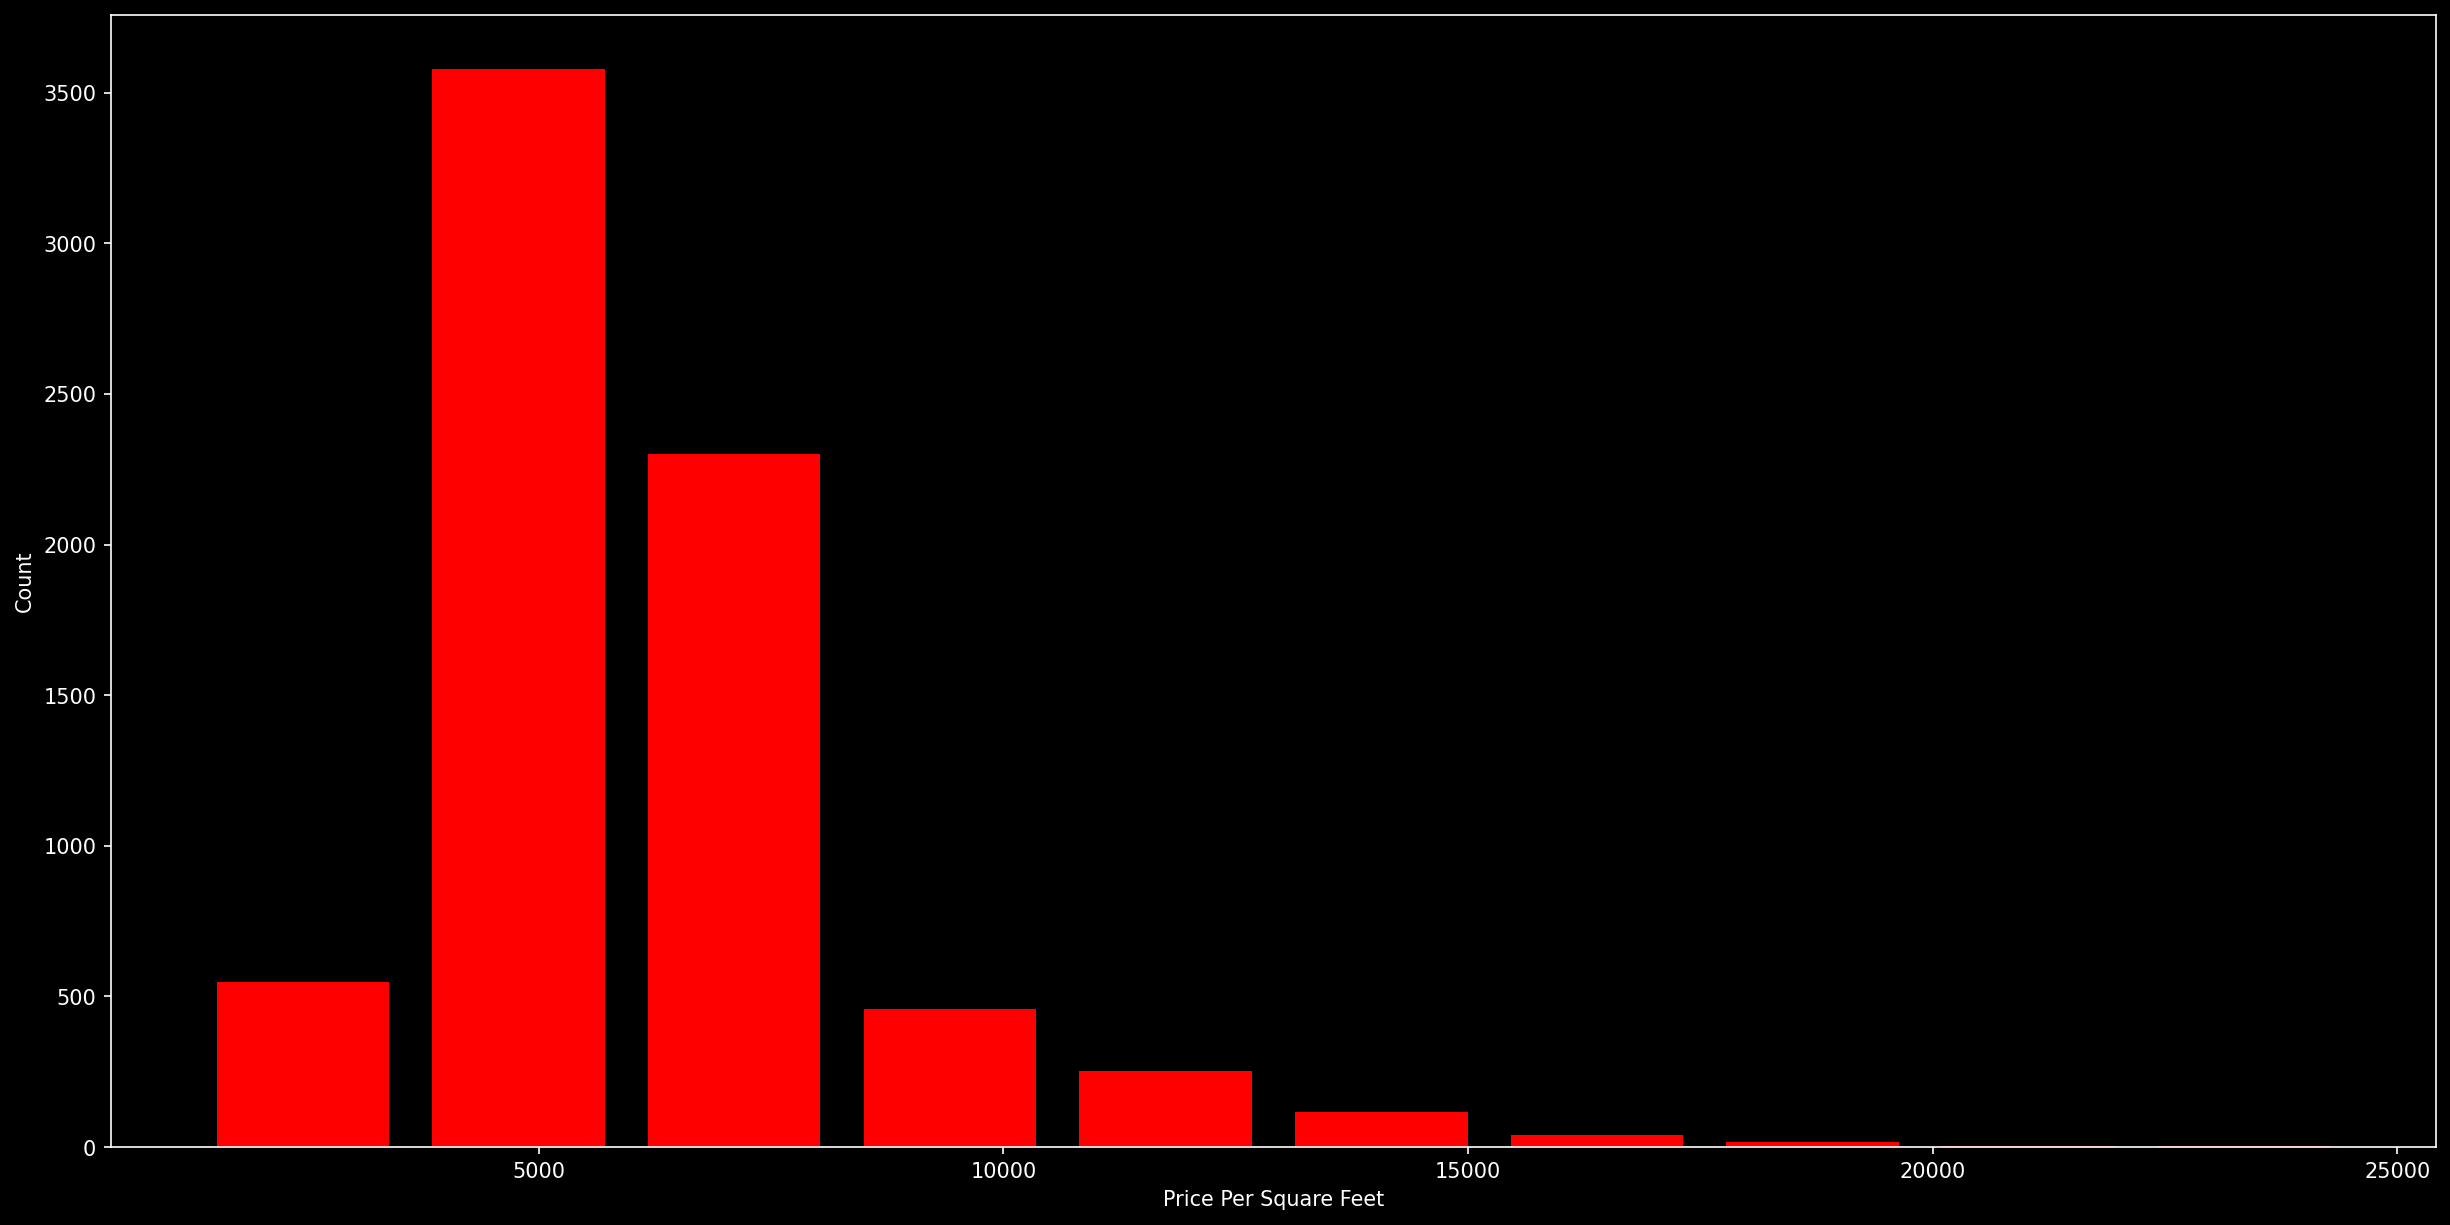

In [32]:
plt.figure(dpi=150, figsize=(20,10))
plt.hist(data['price_per_sqft'],rwidth=0.8, color = "red")
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### 3. bath

Text(0, 0.5, 'Count')

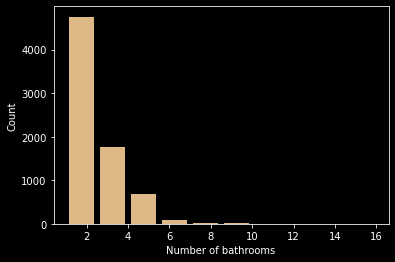

In [33]:
plt.hist(data['bath'], rwidth=0.8, color = "burlywood")
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [34]:
data['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [35]:
data[data.bath>10]

,location,size,total_sqft,bath,price (in lakhs),bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [36]:
data = data[data['bath']<data['bhk']+2].drop(['size','price_per_sqft'],axis='columns')
data.shape

(7239, 5)

# DUMMIES

In [37]:
dummies = pd.get_dummies(data['location'])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
data = pd.concat([data,dummies.drop('other',axis='columns')],axis='columns')
data.head()

,location,total_sqft,bath,price (in lakhs),bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
data = data.drop('location',axis='columns')
data.head()

,total_sqft,bath,price (in lakhs),bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
data.to_csv('Processed Bengaluru Housing Data.csv', index=False)

# MODEL BULDING

In [41]:
X = data.drop(['price (in lakhs)'],axis='columns')
Y = data['price (in lakhs)']

# TRAIN TEST DATASET

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

# LINEAR REGRESSION

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train,y_train)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5791, 243), (1448, 243), (5791,), (1448,))

In [44]:
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

In [45]:
from sklearn.metrics import r2_score
train_score = r2_score(y_train,pred_train)
test_score = r2_score(y_test,pred_test)
print("Linear Regression - Train Score : ",train_score, "Test Score : ",test_score)

Linear Regression - Train Score :  0.8523137584485154 Test Score :  0.8629132245229444


In [46]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

# RANDOM FOREST REGRESSOR

In [47]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

RandomForestRegressor()

In [48]:
pred_train=reg.predict(x_train)
pred_test=reg.predict(x_test)

In [49]:
train_score = r2_score(y_train,pred_train)
test_score = r2_score(y_test,pred_test)
print("Random Forest Regression - Train Score : ",train_score, "Test Score : ",test_score)

Random Forest Regression - Train Score :  0.9616899129496267 Test Score :  0.7757141483451567


In [50]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(RandomForestRegressor(), X, Y, cv=cv)

array([0.83670572, 0.83738418, 0.77603715, 0.63103932, 0.84318759])

# XGBOOST REGRESSOR

In [51]:
from xgboost import XGBRFRegressor
xgb = XGBRFRegressor()
xgb.fit(x_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [52]:
pred_train=xgb.predict(x_train)
pred_test=xgb.predict(x_test)

In [53]:
train_score = r2_score(y_train,pred_train)
test_score = r2_score(y_test,pred_test)
print("XGBOOST Regression - Train Score : ",train_score, "Test Score : ",test_score)

XGBOOST Regression - Train Score :  0.8607519363931818 Test Score :  0.7736575774261685


In [54]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(XGBRFRegressor(), X, Y, cv=cv)

array([0.840151  , 0.80842647, 0.68860419, 0.5605716 , 0.79644221])

# PREDICTOR

In [59]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr.predict([x])[0]


In [56]:
predict_price('Indira Nagar',1500, 5, 5)

116


240.01568973362507

In [57]:
predict_price('Ananth Nagar',1600, 2, 3)

20


81.62676605303959

In [58]:
import pickle
pickle.dump(lr, open("bengaluru_house_price.pkl",'wb'))